<a href="https://colab.research.google.com/github/SreekarDugyala/Sreekar_INFO5731_Fall_2021/blob/main/INFO5731_Assignment_Three_fall2022_Sreekar_Dugyala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here

import pandas as pd
import numpy as np
dataframe = pd.read_csv( "customerReviews.csv",encoding='latin1')
n = 3

def freq(n, dataframe):
    ngram = []
    for i in range(len(dataframe)):
        ngram.append(dataframe.iloc[i]['Review Description'].split())
    ngram = np.array(ngram)
    ngram = ngram.reshape(len(ngram), -1)
    ngram = ngram.tolist()
    ngram = [item for sublist in ngram for item in sublist]

    return ngram

freq(n, dataframe)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


[['iPhone11',
  'Review',
  'A',
  'person',
  'who',
  'uses',
  'every',
  'major',
  'application',
  'of',
  'a',
  'phone',
  'such',
  'as',
  'a',
  'camera,',
  'notes,',
  'gaming,',
  'binge-watching,',
  'and',
  'also',
  'wants',
  'his',
  'phone',
  'to',
  'run',
  'smoothly',
  'for',
  'at',
  'least',
  '3-5',
  'years',
  'may',
  'go',
  'for',
  'iPhone11.',
  'According',
  'to',
  'my',
  'experience,',
  'I',
  'would',
  'suggest',
  'the',
  'iPhone11',
  'as',
  'the',
  'best',
  'choice',
  'because',
  'Iâ\x80\x99ve',
  'been',
  'using',
  'Android',
  'for',
  'the',
  'last',
  '5',
  'years',
  'and',
  'the',
  'issue',
  'which',
  'I',
  'was',
  'facing',
  'with',
  'my',
  'phone',
  'was,',
  'it',
  'started',
  'to',
  'hang',
  'within',
  '2-3',
  'years',
  'of',
  'its',
  'purchase.',
  'It',
  'also',
  'began',
  'to',
  'overheat',
  'if',
  'I',
  'would',
  'continuously',
  'use',
  'its',
  'activities',
  'such',
  'as',
  'watch

In [2]:
def probFrequency(n, dataframe):
    ngram = []
    for i in range(len(dataframe)):
        ngram.append(dataframe.iloc[i]['Review Description'].split())
    ngram = np.array(ngram)
    ngram = ngram.reshape(len(ngram), -1)
    ngram = ngram.tolist()
    ngram = [item for sublist in ngram for item in sublist]

    sums = {}
    for i in range(len(ngram)):
        if ngram[i] in tuple(sums):
            sums[ngram[i]] += 1
    sums = sorted(sums.items(), key=lambda x: x[1], reverse=True)
    sums = sums[:1000]
    sums = np.array(sums)
    sums = sums.tolist()

    for i in range(len(sums)):
        sums[i][1] = sums[i][1] / sums[i][0]

    return sum
probFrequency(n, dataframe)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


<function sum(iterable, start=0, /)>

In [3]:
def nounExtract():
    word_noun = []
    for i in range(len(dataframe)):
        word_noun.append(dataframe.iloc[i]['Review Description'].split())
    word_noun = np.array(word_noun)
    word_noun = word_noun.reshape(len(word_noun), -1)
    word_noun = word_noun.tolist()
    word_noun = [item for sublist in word_noun for item in sublist]
    word_noun = [item for item in word_noun]
    word_noun = [item for item in word_noun if len(item) > 2]
    word_noun = [item for item in word_noun if item not in ['a', 'the', 'an', 'is', 'are', 'was', 'were', 'am', 'i', 'my', 'me', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he'] ]

    return word_noun

nounExtract()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


[['iPhone11',
  'Review',
  'A',
  'person',
  'who',
  'uses',
  'every',
  'major',
  'application',
  'of',
  'a',
  'phone',
  'such',
  'as',
  'a',
  'camera,',
  'notes,',
  'gaming,',
  'binge-watching,',
  'and',
  'also',
  'wants',
  'his',
  'phone',
  'to',
  'run',
  'smoothly',
  'for',
  'at',
  'least',
  '3-5',
  'years',
  'may',
  'go',
  'for',
  'iPhone11.',
  'According',
  'to',
  'my',
  'experience,',
  'I',
  'would',
  'suggest',
  'the',
  'iPhone11',
  'as',
  'the',
  'best',
  'choice',
  'because',
  'Iâ\x80\x99ve',
  'been',
  'using',
  'Android',
  'for',
  'the',
  'last',
  '5',
  'years',
  'and',
  'the',
  'issue',
  'which',
  'I',
  'was',
  'facing',
  'with',
  'my',
  'phone',
  'was,',
  'it',
  'started',
  'to',
  'hang',
  'within',
  '2-3',
  'years',
  'of',
  'its',
  'purchase.',
  'It',
  'also',
  'began',
  'to',
  'overheat',
  'if',
  'I',
  'would',
  'continuously',
  'use',
  'its',
  'activities',
  'such',
  'as',
  'watch

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [4]:
# Write your code here

def doc_terms_matrix_bold(dataframe):
    #calculate idf
    idf = {}
    for i in range(len(dataframe)):
        for word in dataframe.iloc[i]['Review Description'].split():
            if word in idf:
                idf[word] += 1
            else:
                idf[word] = 1
    idf = {k: np.log(len(dataframe) / v) for k, v in idf.items()}

    tf = {}
    for i in range(len(dataframe)):
        for word in dataframe.iloc[i]['Review Description'].split():
            if word in tf:
                tf[word] += 1
            else:
                tf[word] = 1
    tf = {k: v / len(dataframe.iloc[i]['Review Description'].split()) for k, v in tf.items()}

    return tf

doc_terms_matrix_bold

query = "An Outstanding movie with a haunting performance and best character development"
def rank_doc_with_query(query):
    query = query.split()
    query = [item for item in query if item.isalpha()]
    query = [item for item in query if len(item) > 2]
    query = [item for item in query if item.lower() not in ['a', 'the', 'an', 'is', 'are', 'was', 'were', 'am', 'i', 'my', 'me', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your'] ]

    #rank the document
    wight = doc_terms_matrix_bold(dataframe)
    rank = {}
    for i in range(len(wight)):
        rank[i] = 0
        for word in query:
            if word in wight:
                rank[i] += 10
    rank = sorted(rank.items(), key=lambda x: x[1], reverse=True)
    rank = rank[:10]
    rank = np.array(rank)
    rank = rank.tolist()
    return rank

rank_doc_with_query(query)



[[0, 40],
 [1, 40],
 [2, 40],
 [3, 40],
 [4, 40],
 [5, 40],
 [6, 40],
 [7, 40],
 [8, 40],
 [9, 40]]

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Computing 69 nearest neighbors...
[t-SNE] Indexed 70 samples in 0.000s...
[t-SNE] Computed neighbors for 70 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 70 / 70
[t-SNE] Mean sigma: 0.212261
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.990265
[t-SNE] KL divergence after 1000 iterations: 0.016393


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, fla

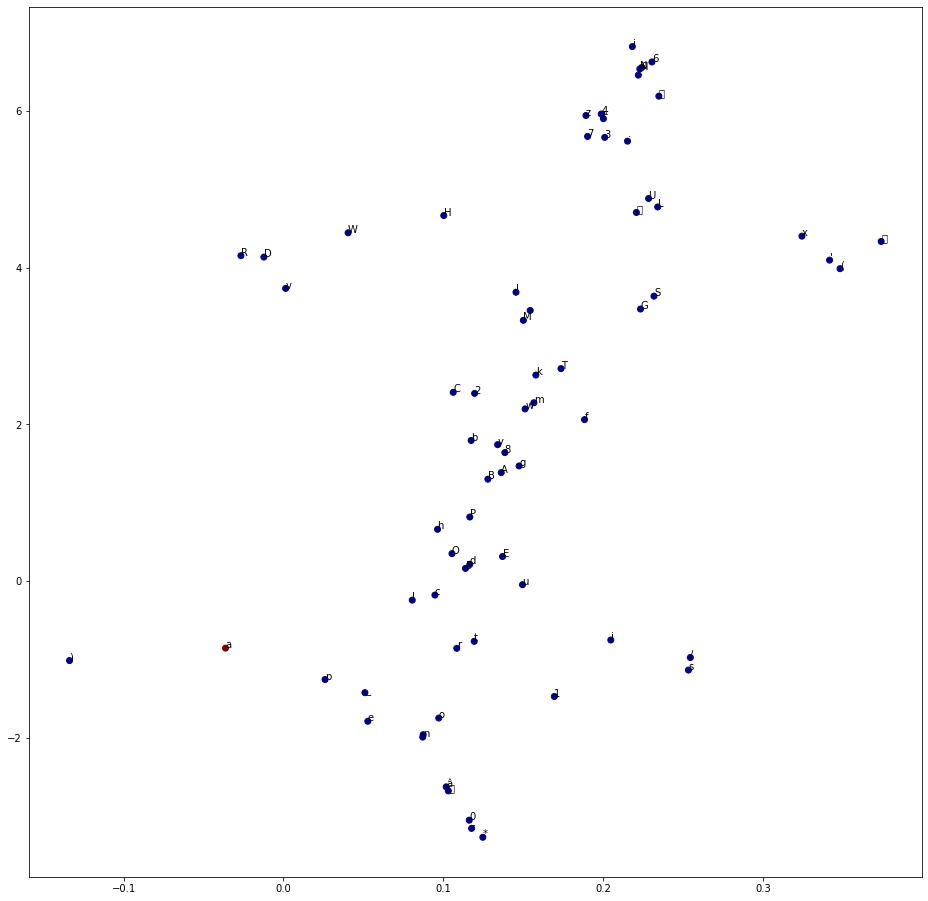

In [6]:
# Write your code here

from gensim.models import Word2Vec
def train_300_dimention():
    #train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).
    #load data
    dataframe = pd.read_csv( "customerReviews.csv",encoding='latin1')
    #build the documents-terms weights (tf*idf) matrix bold text.
    wight = doc_terms_matrix_bold(dataframe)
    #train word2vec
    model = Word2Vec(wight, window=5, size= 300, min_count=5, workers=4)
    return model

train_300_dimention()

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def visualize_word_embedding(model):
    #visualize the word embedding model you created.
    #load data
    dataframe = pd.read_csv( "customerReviews.csv",encoding='latin1')
    #build the documents-terms weights (tf*idf) matrix bold text.
    wight = doc_terms_matrix_bold(dataframe)
    #train word2vec
    model = Word2Vec(wight, window=5, size = 300, min_count=5, workers=4)
    #visualize the word embedding model you created.
    words = list(model.wv.vocab)
    word_vectors = model.wv[words]
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_w2v = tsne_model.fit_transform(word_vectors)
    dataframe = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
    dataframe['words'] = words
    dataframe['labels'] = dataframe['words'].apply(lambda x: 1 if x in ['a', 'the', 'an'] else 0)
    fig, ax = plt.subplots(figsize=(16, 16))
    ax.scatter(x='x', y='y', c='labels', cmap='jet', data=dataframe)
    for i, txt in enumerate(dataframe['words']):
        ax.annotate(txt, (dataframe['x'][i], dataframe['y'][i]))
    plt.show()

visualize_word_embedding(model=train_300_dimention())

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: 



